**Implémentez un modèle de scoring**

Objectif final: un outil de “scoring crédit” pour calculer la probabilité qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé.

macro/micro objectifs:


*   développer un algorithme de classification
*   Élément de liste




exploration des données:

*   application_{train|test}.csv: Données statiques pour toutes les applications. Une ligne représente un prêt
*   bureau.csv: represente Tous les crédits antérieurs du client fournis par d'autres institutions. une ligne represente
*   bureau_balance.csv: Soldes mensuels des crédits précédents. une ligne pour chaque mois d'historique de chaque crédit
*   POS_CASH_balance.csv: Aperçus du solde mensuel des précédents points de vente.  une ligne pour chaque mois d'historique de chaque crédit précédent en crédit immobilier
*   credit_card_balance.csv: Aperçus du solde mensuel des cartes de crédit précédentes que le demandeur possède avec Home Credit.  une ligne pour chaque mois d'historique de chaque crédit précédent en crédit immobilier
*   previous_application.csv: Toutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts. Une ligne pour chaque demande précédente
*   installments_payments.csv: Historique de remboursement des crédits. Une ligne équivaut à un versement
*   HomeCredit_columns_description.csv: descriptions pour les colonnes des différents fichiers de données.









# Import des librairie

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Nettoyage

In [ ]:

# Chemin vers le dossier contenant les fichiers CSV #'./dashboard data/Projet+Mise+en+prod+-+home-credit-default-risk'
path = './dashboard data/Projet+Mise+en+prod+-+home-credit-default-risk'
# Dictionnaire pour stocker les données
data = {}
dic_variables={}

# Boucle pour lire tous les fichiers CSV dans le dossier
for filename in os.listdir(path):
    if filename.endswith('.csv'):
        # Lit le fichier CSV avec pandas
        df = pd.read_csv(os.path.join(path, filename) , encoding='ISO-8859-1')
        # Stocke les données dans le dictionnaire en utilisant le nom de fichier comme clé
        data[filename[:-4]] = df  # [:-4] enlève l'extension .csv du nom de fichier, et pour avoir des df au meme nom que le fichier csv

        print('\ndata for {}:'.format(filename))
        display(df.head(2))
        #display(df.isnull().sum())
# Utilisation des données stockées dans le dictionnaire
#for key, value in data.items():
 #   globals()[key] = value

#data.keys()


data for application_test.csv:


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0



data for application_train.csv:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0



data for bureau.csv:


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN



data for bureau_balance.csv:


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C



data for credit_card_balance.csv:


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0



data for HomeCredit_columns_description.csv:


,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN



data for POS_CASH_balance.csv:


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0



data for previous_application.csv:


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0



data for sample_submission.csv:


,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5


In [ ]:
description_data=pd.read_csv(path+'/HomeCredit_columns_description.csv',  encoding='ISO-8859-1')

In [ ]:
description_data.shape

(219, 5)

In [ ]:
cross_variables=description_data.groupby('Row').agg({'Description': 'unique', 'Table': lambda x: ', '.join(x)}).reset_index()


In [ ]:
cross_variables.head()

,Row,Description,Table
0,AMT_ANNUITY,"[Loan annuity, Annuity of the Credit Bureau cr...","application_{train|test}.csv, bureau.csv, prev..."
1,AMT_APPLICATION,[For how much credit did client ask on the pre...,previous_application.csv
2,AMT_BALANCE,[Balance during the month of previous credit],credit_card_balance.csv
3,AMT_CREDIT,"[Credit amount of the loan, Final credit amoun...","application_{train|test}.csv, previous_applica..."
4,AMT_CREDIT_LIMIT_ACTUAL,[Credit card limit during the month of the pre...,credit_card_balance.csv


## Nettoyage des train_test application

In [ ]:
train_df=pd.read_csv(path+'/application_train.csv')
train_df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_df.shape

(307511, 122)

In [ ]:
train_df['TARGET'].unique()

array([1, 0], dtype=int64)

In [ ]:
test_df=pd.read_csv(path+'/application_test.csv')
test_df.head(2)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
test_df.shape

(48744, 121)

In [ ]:
len((train_df.columns).intersection(test_df.columns))

121

In [ ]:
set(train_df.columns)-set(test_df.columns)

{'TARGET'}

In [ ]:
test_df['TARGET']=np.nan

pour faciliter le nettoyage on va concatener les train_df et test_df

In [ ]:
df=pd.concat([train_df, test_df] , ignore_index=True)
df.shape

(356255, 122)

In [ ]:
for row_value in df.columns.tolist():
    description = description_data.loc[description_data['Row'] == row_value, 'Description'].values[0]
    print(f"{row_value}: {description}")

SK_ID_CURR: ID of loan in our sample
TARGET: Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
NAME_CONTRACT_TYPE: Identification if loan is cash or revolving
CODE_GENDER: Gender of the client
FLAG_OWN_CAR: Flag if the client owns a car
FLAG_OWN_REALTY: Flag if client owns a house or flat
CNT_CHILDREN: Number of children the client has
AMT_INCOME_TOTAL: Income of the client
AMT_CREDIT: Credit amount of the loan
AMT_ANNUITY: Loan annuity
AMT_GOODS_PRICE: For consumer loans it is the price of the goods for which the loan is given
NAME_TYPE_SUITE: Who was accompanying client when he was applying for the loan
NAME_INCOME_TYPE: Clients income type (businessman, working, maternity leave,)
NAME_EDUCATION_TYPE: Level of highest education the client achieved
NAME_FAMILY_STATUS: Family status of the client
NAME_HOUSING_TYPE: What is the housing situation of t

In [ ]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,356255.000000,307511.000000,356255.000000,3.562550e+05,3.562550e+05,356219.000000,3.559770e+05,356255.000000,356255.000000,356255.000000,...,356255.000000,356255.000000,356255.000000,356255.000000,308687.000000,308687.000000,308687.000000,308687.000000,308687.000000,308687.000000
mean,278128.000000,0.080729,0.414316,1.701161e+05,5.877674e+05,27425.560657,5.280200e+05,0.020917,-16041.248841,64317.231413,...,0.007231,0.000514,0.000438,0.000289,0.005808,0.006281,0.029995,0.231697,0.304399,1.911564
std,102842.104413,0.272419,0.720378,2.235068e+05,3.986237e+05,14732.808190,3.660650e+05,0.013915,4358.803980,141705.532576,...,0.084726,0.022659,0.020921,0.017001,0.079736,0.104250,0.191374,0.855949,0.786915,1.865338
min,100001.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000253,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189064.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16731.000000,2.340000e+05,0.010006,-19676.000000,-2781.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278128.000000,0.000000,0.000000,1.530000e+05,5.002110e+05,25078.500000,4.500000e+05,0.018850,-15755.000000,-1224.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367191.500000,0.000000,1.000000,2.025000e+05,7.975575e+05,34960.500000,6.750000e+05,0.028663,-12425.000000,-290.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,20.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7338.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
train_df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

### Traitement des variables catégorielles

In [ ]:
df.select_dtypes(include=['object']).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [ ]:
#Recherche et elimination des outliers
for var in df.select_dtypes(include=['object']).columns:
  description = description_data.loc[description_data['Table']=='application_{train|test}.csv',:].loc[description_data['Row'] == var, 'Description'].values[0] # description_data.loc[description_data(['Table']=='application_{train|test}.csv',:]
  print(var,':', description, '---')
  print(df[var].unique(), '\n')

NAME_CONTRACT_TYPE : Identification if loan is cash or revolving ---
['Cash loans' 'Revolving loans'] 

CODE_GENDER : Gender of the client ---
['M' 'F' 'XNA'] 

FLAG_OWN_CAR : Flag if the client owns a car ---
['N' 'Y'] 

FLAG_OWN_REALTY : Flag if client owns a house or flat ---
['Y' 'N'] 

NAME_TYPE_SUITE : Who was accompanying client when he was applying for the loan ---
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people'] 

NAME_INCOME_TYPE : Clients income type (businessman, working, maternity leave,) ---
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave'] 

NAME_EDUCATION_TYPE : Level of highest education the client achieved ---
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree'] 

NAME_FAMILY_STATUS : Family status of the client ---
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknow

lors de l'encodage des variable categorielle, j'ai remarqué que la variable "NAME_INCOME_TYPE" du set d'entrainement contient une catégorie "Maternity leave" qui n'existe pas dans le testing set.

Solution: soit on égalise les deux sets avec la commande

    train_df, test_df = train_df.align(test_df, join='inner', axis=1)

ou bien on élimine les prets avec cette varible pour pouvoir automatisé le scaling lors l'usage de l'api

In [ ]:
len(df.loc[df["NAME_INCOME_TYPE"]=="Maternity leave", :]) #5 prets à éliminer

df=df.drop(index=df.loc[df["NAME_INCOME_TYPE"]=="Maternity leave", :].index)

In [ ]:
#traitement de la variable code_gender
  #Il ya une valeur indéfinie 'XNA'

len(df.loc[df['CODE_GENDER']=="XNA", :]) #il y a 4 prets dont la valeur de gender est XNA, on peut les eliminer

df=df.drop(index=df.loc[df['CODE_GENDER']=="XNA", :].index)

In [ ]:
df.loc[df['CODE_GENDER']=="XNA", :]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [ ]:
#Traitement de la variable NAME_FAMILY_STATUS
  #Il y a 2 pret dont le statut familial n'est pas défini, on peut les supprimer
df.loc[df['NAME_FAMILY_STATUS']=='Unknown', :]

df=df.drop(index=df.loc[df['NAME_FAMILY_STATUS']=='Unknown', :].index)

In [ ]:
#remplacement des valeur par la catégorie la plus observé de la variable
for var in df.select_dtypes(include=['object']).columns:
  mode_value = df[var].mode()[0]
  df[var].fillna(mode_value, inplace=True)

### Traitement des variables numériques

In [ ]:
df.select_dtypes(include=['number']).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [ ]:
for var in df.select_dtypes(include=['number']).columns:
  description = description_data.loc[description_data['Table']=='application_{train|test}.csv',:].loc[description_data['Row'] == var, 'Description'].values[0] if var in description_data['Row'].unique() else None
  print(var,':', description, '---')
  print(df[var].describe(), '\n')

SK_ID_CURR : ID of loan in our sample ---
count    356244.000000
mean     278128.489715
std      102841.801434
min      100001.000000
25%      189065.750000
50%      278128.500000
75%      367192.250000
max      456255.000000
Name: SK_ID_CURR, dtype: float64 

TARGET : Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases) ---
count    307500.000000
mean          0.080725
std           0.272413
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64 

CNT_CHILDREN : Number of children the client has ---
count    356244.000000
mean          0.414300
std           0.720367
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: CNT_CHILDREN, dtype: float64 

AMT_INCOME_TOTAL : Income of the client ---
count

count    148665.000000
mean          0.088674
std           0.082313
min           0.000000
25%           0.044500
50%           0.076500
75%           0.112300
max           1.000000
Name: BASEMENTAREA_AVG, dtype: float64 

YEARS_BEGINEXPLUATATION_AVG : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor ---
count    183386.000000
mean          0.977889
std           0.057930
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64 

YEARS_BUILD_AVG : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elev

count    113273.000000
mean          0.106383
std           0.098780
min           0.000000
25%           0.054200
50%           0.077100
75%           0.131300
max           1.000000
Name: LIVINGAPARTMENTS_MODE, dtype: float64 

LIVINGAREA_MODE : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor ---
count    178347.000000
mean          0.106642
std           0.112556
min           0.000000
25%           0.043100
50%           0.073300
75%           0.125800
max           1.000000
Name: LIVINGAREA_MODE, dtype: float64 

NONLIVINGAPARTMENTS_MODE : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, num

count    356243.000000
mean       -978.587287
std         835.068489
min       -4361.000000
25%       -1592.000000
50%        -771.000000
75%        -286.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64 

FLAG_DOCUMENT_2 : Did client provide document 2 ---
count    356244.000000
mean          0.000036
std           0.006041
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_2, dtype: float64 

FLAG_DOCUMENT_3 : Did client provide document 3 ---
count    356244.000000
mean          0.720526
std           0.448741
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_DOCUMENT_3, dtype: float64 

FLAG_DOCUMENT_4 : Did client provide document 4 ---
count    356244.000000
mean          0.000084
std           0.009176
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max 

Variables posants des problemes:

  * DAYS_BIRTH  
  * DAYS_EMPLOYED
  * DAYS_REGISTRATION
  * DAYS_ID_PUBLISH

Ces variables ont des valeurs négatives.


---


Variables dont l'utilité est discutables:

  * REGION_POPULATION_RELATIVE: utilité?
  * OWN_CAR_AGE: utilité
  * FLAG_EMP_PHONE: utilité??
  * FLAG_WORK_PHONE, FLAG_PHONE c’est pas la meme
  * REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY: c’est pas la meme chose? utilité??
  * HOUR_APPR_PROCESS_START: utilité
  * REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY: c’est pas la mem chose?? utilité
  * REG_REGION_NOT_LIVE_REGION, REG_CITY_NOT_LIVE_CITY
  * EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3: à quoi sert?
  * DAYS_LAST_PHONE_CHANGE
  * WEEKDAY_APPR_PROCESS_START

Ces variables vont etre eliminées de  notre jeux données

---

**Building info**
  * APARTMENTS_AVG
  * BASEMENTAREA_AVG
  * YEARS_BEGINEXPLUATATION_AVG
  * YEARS_BUILD_AVG
  * COMMONAREA_AVG
  * ELEVATORS_AVG
  * ENTRANCES_AVG
  * FLOORSMAX_AVG
  * FLOORSMIN_AVG
  * LANDAREA_AVG
  * NONLIVINGAPARTMENTS_AVG
  * NONLIVINGAREA_AVG

Ces variables vont etre eliminées de notre jeux de données ainsi que toutes les variable mode et mediane des information des batiments , les valeurs moyenne seront suffisante pour notre analyse


LEs variables
* FLAG_DOCUMENT(2-21)
* AMT_REQ_CREDIT_BUREAU_(HOUR, MON, ...)

vont etre éliminées et remplacer par des variables généralistes:
* provided_flag_documents: somme des flag documents
* AMT_REQ_CREDIT_BUREAU_SUM: somme des demandes de renseignements avant avant la demande de crédit

#### Traitement des variables négatives

In [ ]:
# Traitement de la variable DAYS_BIRTH
print(description_data.loc[description_data['Row'] == 'DAYS_BIRTH', 'Description'].values[0])

df['DAYS_BIRTH'].describe()

Client's age in days at the time of application


count    356244.000000
mean     -16041.313002
std        4358.803965
min      -25229.000000
25%      -19676.000000
50%      -15755.000000
75%      -12425.000000
max       -7338.000000
Name: DAYS_BIRTH, dtype: float64

toutes les valeurs d'age en jour sont négatives, je vais garder la valeur absolue pour cette variable pour le reste du projet.

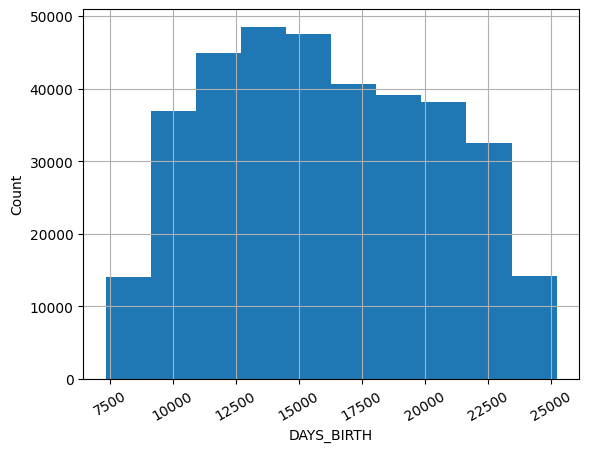

In [ ]:
df['DAYS_BIRTH']=abs(df['DAYS_BIRTH'])
df['DAYS_BIRTH'].hist()
plt.xlabel('DAYS_BIRTH')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()



---



In [ ]:
# Traitement de la variable DAYS_EMPLOYED

print(description_data.loc[description_data['Row'] == 'DAYS_EMPLOYED', 'Description'].values[0], '\n')
df['DAYS_EMPLOYED'].describe()

How many days before the application the person started current employment 



count    356244.000000
mean      64319.304230
std      141707.228656
min      -17912.000000
25%       -2781.000000
50%       -1224.000000
75%        -290.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

la majorité des valeurs sont négative

In [ ]:
df.loc[df['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'].unique() # il y a une seule valeur unique superieure à 0 et le reste est négative.
                                                          # cette valeur est égale à 365243 jours, equivalent à 1000 ans
len(df.loc[df['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED']) # cette variable est observée dans 64648 cas. on ne peut pas les éliminer.
#donc ils vot etre remplacer par np.na (ou moyenne de catégorie). et pour les valeurs négatives on va garder leur valeur absolue pour le rest du projet.

df['DAYS_EMPLOYED'].replace(df.loc[df['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'].unique(), np.nan, inplace=True)

In [ ]:
df.loc[df['DAYS_EMPLOYED'].isna(), 'DAYS_EMPLOYED']

8        NaN
11       NaN
23       NaN
38       NaN
43       NaN
          ..
356228   NaN
356239   NaN
356242   NaN
356246   NaN
356247   NaN
Name: DAYS_EMPLOYED, Length: 64648, dtype: float64

In [ ]:
df['DAYS_EMPLOYED']=abs(df['DAYS_EMPLOYED'])
df['DAYS_EMPLOYED'].describe()

count    291596.000000
mean       2396.683247
std        2334.471043
min           0.000000
25%         780.000000
50%        1663.000000
75%        3200.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

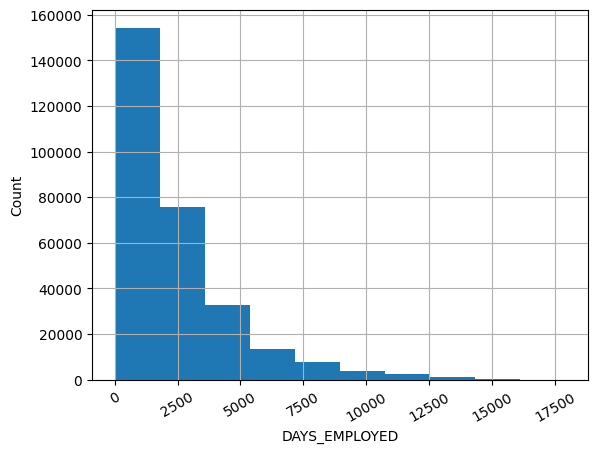

In [ ]:
df['DAYS_EMPLOYED'].hist()
plt.xlabel('DAYS_EMPLOYED')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()



---



In [ ]:
# Traitement de la variable DAYS_REGISTRATION
print(description_data.loc[description_data['Row'] == 'DAYS_REGISTRATION', 'Description'].values[0], '\n')
df['DAYS_REGISTRATION'].describe()

How many days before the application did client change his registration 



count    356244.000000
mean      -4983.621175
std        3526.966509
min      -24672.000000
25%       -7477.000000
50%       -4502.000000
75%       -1995.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

Toutes les valeur sont négatives, la valeur absolue va etre considéré pour la suite.

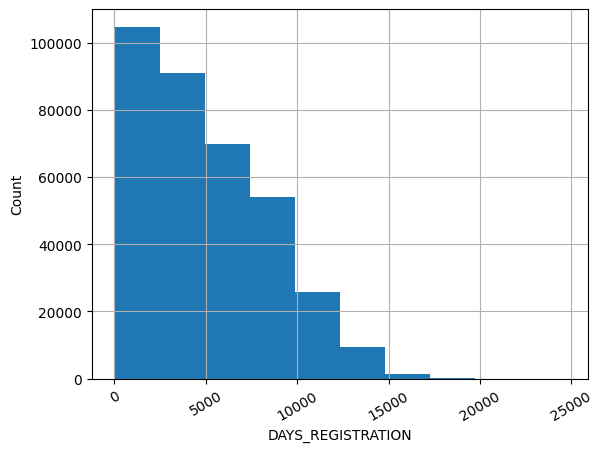

In [ ]:
df['DAYS_REGISTRATION']=abs(df['DAYS_REGISTRATION'])

df['DAYS_REGISTRATION'].hist()
plt.xlabel('DAYS_REGISTRATION')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()



---



In [ ]:
# Traitement de la variable DAYS_ID_PUBLISH
print(description_data.loc[description_data['Row'] == 'DAYS_ID_PUBLISH', 'Description'].values[0], '\n')
df['DAYS_ID_PUBLISH'].describe()

How many days before the application did client change the identity document with which he applied for the loan 



count    356244.000000
mean      -3002.072372
std        1517.904029
min       -7197.000000
25%       -4318.000000
50%       -3252.000000
75%       -1717.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

Toutes les valeur sont négatives, la valeur absolue va etre considéré pour la suite.

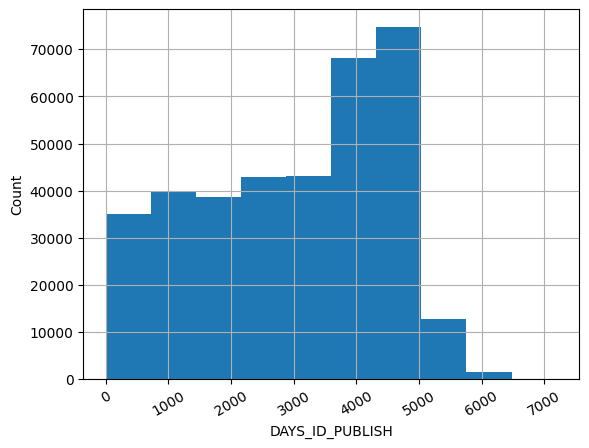

In [ ]:
df['DAYS_ID_PUBLISH']=abs(df['DAYS_ID_PUBLISH'])

df['DAYS_ID_PUBLISH'].hist()
plt.xlabel('DAYS_ID_PUBLISH')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

#### Simplification des données et feature ingeneering

In [ ]:
#pour svoir quel type d'info batiment on va garder, on va choisir une variable informatif et renseignée sur quasi tous les cas
for column in df.filter(like='_AVG').columns:
  print(column, '(', round(df[column].isna().mean() * 100, 2), '%):', description_data.loc[description_data['Row'] == column, 'Description'].values[0] if column in description_data['Row'].unique() else None)

# toute les variables _AVG vont etre eliminer de notre jeux de données (aucune utilité pourvée pour ces données) à l'exception de LIVINGAREA_AVG, qui presente la surface habitale du logement où le client habite


APARTMENTS_AVG ( 50.51 %): Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
BASEMENTAREA_AVG ( 58.27 %): Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
YEARS_BEGINEXPLUATATION_AVG ( 48.52 %): Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
YEARS_BUILD_AVG ( 66.33 %): Normalized information about building where t

In [ ]:
df.filter(like='_AVG')

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG
0,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000
1,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356252,0.1113,0.1364,0.9955,NaN,NaN,0.16,0.1379,0.3333,NaN,NaN,NaN,0.1383,NaN,0.0542
356253,0.1629,0.0723,0.9896,NaN,NaN,0.16,0.0690,0.6250,NaN,NaN,NaN,0.1563,NaN,0.1490


In [ ]:
#élimination des variables inutiles
eliminated_cols=['REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'REGION_RATING_CLIENT',
                 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_CITY_NOT_LIVE_CITY',
                 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'WEEKDAY_APPR_PROCESS_START']

df=df.drop(columns=eliminated_cols)


#elimination de toutes les valeur mode et mediane des information batiments
avg_cols=df.filter(like='_AVG').columns
avg_cols=avg_cols[avg_cols!= 'LIVINGAREA_AVG']
df=df = df.drop(columns=avg_cols, axis=1)
df = df.drop(df.filter(like='_MODE').columns, axis=1)
df = df.drop(df.filter(like='_MEDI').columns, axis=1)

In [ ]:
df.columns.get_loc('FLAG_DOCUMENT_2')

31

In [ ]:
df.columns.get_loc('FLAG_DOCUMENT_21')

50

In [ ]:
df['provided_flag_documents']=df.iloc[:, 31:51].sum(axis=1) #nombre de flag documents fournis
df=df.drop(columns=df.iloc[:, 31:51].columns) # suppression des variables flag documents

In [ ]:
df.columns.get_loc('AMT_REQ_CREDIT_BUREAU_HOUR')

31

In [ ]:
df.columns.get_loc('AMT_REQ_CREDIT_BUREAU_YEAR')

36

In [ ]:
df['AMT_REQ_CREDIT_BUREAU_SUM']=df.iloc[:, 31:37].sum(axis=1) #nombre de flag documents fournis
df=df.drop(columns=df.iloc[:, 31:37].columns) # suppression des variables flag documents

In [ ]:
df.shape

(356244, 33)

In [ ]:
df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,LIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,provided_flag_documents,AMT_REQ_CREDIT_BUREAU_SUM
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Laborers,1.0,Business Entity Type 3,0.0190,2.0,2.0,2.0,2.0,1,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Core staff,2.0,School,0.0549,1.0,0.0,1.0,0.0,1,0.0


In [ ]:
#Taux des valeurs nan pour chaque variable
for column in df.columns:
  print(column, ': ', round(df[column].isna().mean() * 100, 2), '%')
 #, description_data.loc[description_data['Row'] == column, 'Description'].values[0] if column in description_data['Row'].unique() else None


SK_ID_CURR :  0.0 %
TARGET :  13.68 %
NAME_CONTRACT_TYPE :  0.0 %
CODE_GENDER :  0.0 %
FLAG_OWN_CAR :  0.0 %
FLAG_OWN_REALTY :  0.0 %
CNT_CHILDREN :  0.0 %
AMT_INCOME_TOTAL :  0.0 %
AMT_CREDIT :  0.0 %
AMT_ANNUITY :  0.01 %
AMT_GOODS_PRICE :  0.08 %
NAME_TYPE_SUITE :  0.0 %
NAME_INCOME_TYPE :  0.0 %
NAME_EDUCATION_TYPE :  0.0 %
NAME_FAMILY_STATUS :  0.0 %
NAME_HOUSING_TYPE :  0.0 %
DAYS_BIRTH :  0.0 %
DAYS_EMPLOYED :  18.15 %
DAYS_REGISTRATION :  0.0 %
DAYS_ID_PUBLISH :  0.0 %
FLAG_MOBIL :  0.0 %
FLAG_CONT_MOBILE :  0.0 %
FLAG_EMAIL :  0.0 %
OCCUPATION_TYPE :  0.0 %
CNT_FAM_MEMBERS :  0.0 %
ORGANIZATION_TYPE :  0.0 %
LIVINGAREA_AVG :  49.94 %
OBS_30_CNT_SOCIAL_CIRCLE :  0.29 %
DEF_30_CNT_SOCIAL_CIRCLE :  0.29 %
OBS_60_CNT_SOCIAL_CIRCLE :  0.29 %
DEF_60_CNT_SOCIAL_CIRCLE :  0.29 %
provided_flag_documents :  0.0 %
AMT_REQ_CREDIT_BUREAU_SUM :  0.0 %


In [ ]:
for column in df.columns:
  if df[column].isna().mean() * 100>0:
     print(column, '(', round(df[column].isna().mean() * 100, 2), '%):', description_data.loc[description_data['Row'] == column, 'Description'].values[0] if column in description_data['Row'].unique() else None)


TARGET ( 13.68 %): Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
AMT_ANNUITY ( 0.01 %): Loan annuity
AMT_GOODS_PRICE ( 0.08 %): For consumer loans it is the price of the goods for which the loan is given
DAYS_EMPLOYED ( 18.15 %): How many days before the application the person started current employment
LIVINGAREA_AVG ( 49.94 %): Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
OBS_30_CNT_SOCIAL_CIRCLE ( 0.29 %): How many observation of client's social surroundings with observable 30 DPD (days past due) default
DEF_30_CNT_SOCIAL_CIRCLE ( 0.29 %): How many observation of client's social surroundings defaulted on 30 DPD (day

In [ ]:
df.isna().mean() * 100

SK_ID_CURR                    0.000000
TARGET                       13.682757
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
FLAG_OWN_REALTY               0.000000
CNT_CHILDREN                  0.000000
AMT_INCOME_TOTAL              0.000000
AMT_CREDIT                    0.000000
AMT_ANNUITY                   0.010105
AMT_GOODS_PRICE               0.077475
NAME_TYPE_SUITE               0.000000
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_FAMILY_STATUS            0.000000
NAME_HOUSING_TYPE             0.000000
DAYS_BIRTH                    0.000000
DAYS_EMPLOYED                18.147113
DAYS_REGISTRATION             0.000000
DAYS_ID_PUBLISH               0.000000
FLAG_MOBIL                    0.000000
FLAG_CONT_MOBILE              0.000000
FLAG_EMAIL                    0.000000
OCCUPATION_TYPE               0.000000
CNT_FAM_MEMBERS               0.000000
ORGANIZATION_TYPE        

In [ ]:
 impute_col=df.columns[df.isna().any()].drop('TARGET')
 for col in impute_col:
  df[col]=df[col].fillna(df[col].mean())

In [ ]:
df.columns[df.isna().any()]

Index(['TARGET'], dtype='object')

In [ ]:
df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,LIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,provided_flag_documents,AMT_REQ_CREDIT_BUREAU_SUM
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Laborers,1.0,Business Entity Type 3,0.0190,2.0,2.0,2.0,2.0,1,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Core staff,2.0,School,0.0549,1.0,0.0,1.0,0.0,1,0.0




---



## bureau.csv

bureau.csv: represente Tous les crédits antérieurs du client fournis par d'autres institutions. une ligne represente un crédit


# Exploration

In [ ]:
df.dtypes

SK_ID_CURR                     int64
TARGET                       float64
NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
CNT_CHILDREN                   int64
AMT_INCOME_TOTAL             float64
AMT_CREDIT                   float64
AMT_ANNUITY                  float64
AMT_GOODS_PRICE              float64
NAME_TYPE_SUITE               object
NAME_INCOME_TYPE              object
NAME_EDUCATION_TYPE           object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
DAYS_BIRTH                     int64
DAYS_EMPLOYED                float64
DAYS_REGISTRATION            float64
DAYS_ID_PUBLISH                int64
FLAG_MOBIL                     int64
FLAG_CONT_MOBILE               int64
FLAG_EMAIL                     int64
OCCUPATION_TYPE               object
CNT_FAM_MEMBERS              float64
ORGANIZATION_TYPE             object
LIVINGAREA_AVG               float64
O

In [ ]:
#selectionner les colonne qui sont de type booléen, pour qu'elles ne soient  nirmaliser ( scaled)
colonnes_a_convertir = [colonne for colonne in df.columns if df[colonne].isin([0, 1]).all()]
df[colonnes_a_convertir] = df[colonnes_a_convertir].astype(bool)
df.dtypes

SK_ID_CURR                     int64
TARGET                       float64
NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
CNT_CHILDREN                   int64
AMT_INCOME_TOTAL             float64
AMT_CREDIT                   float64
AMT_ANNUITY                  float64
AMT_GOODS_PRICE              float64
NAME_TYPE_SUITE               object
NAME_INCOME_TYPE              object
NAME_EDUCATION_TYPE           object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
DAYS_BIRTH                     int64
DAYS_EMPLOYED                float64
DAYS_REGISTRATION            float64
DAYS_ID_PUBLISH                int64
FLAG_MOBIL                      bool
FLAG_CONT_MOBILE                bool
FLAG_EMAIL                      bool
OCCUPATION_TYPE               object
CNT_FAM_MEMBERS              float64
ORGANIZATION_TYPE             object
LIVINGAREA_AVG               float64
O

In [ ]:
#division des données en 2 sets: train_df et test_df tel que défini initialement
train_df=df.loc[df['TARGET'].notnull(), :]
test_df=df.loc[df['TARGET'].isna(), :]

**Represtentaion graphique des parametre (pour les données train)** :

1. variabel target (% des client ayant des difficulté de payement)

2. presentation de NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, CODE_GENDER, CNT_CHILDREN dans les deux cas (avec ou sans difficulté)

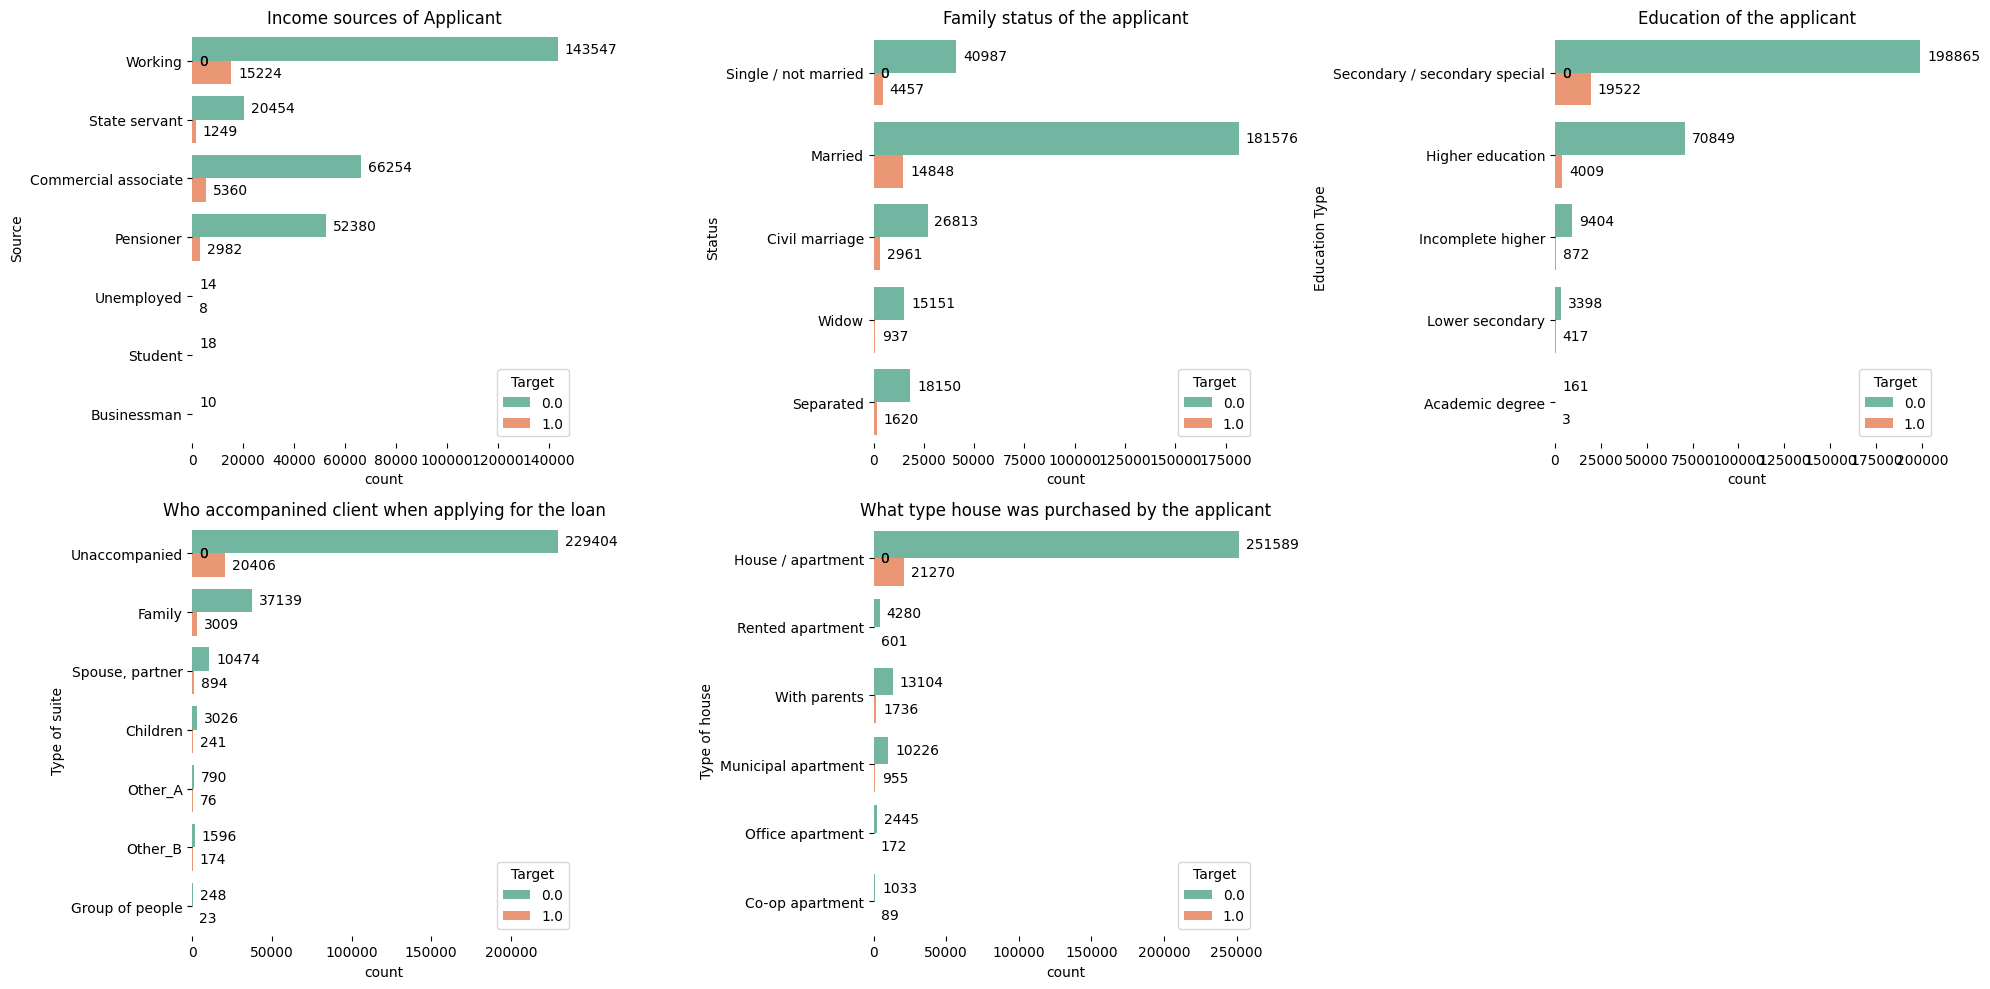

In [ ]:
# function to display horizontal bar chart
def barHorizontal(columns, ylables, title, tight=False):
    if tight:
        plt.figure(figsize=(20,15), tight_layout=True)
    else:
        plt.figure(figsize=(20,10), tight_layout=True)
    for index, col in enumerate(columns):
        plt.subplot(2, 3, index+1)
        barH = sns.countplot(y = col, data = train_df,  hue='TARGET', palette='Set2')
        barH.set_ylabel(ylables[index])
        barH.set_title(title[index])
        barH.legend(title="Target")
        barH.legend(title="Target", loc="lower right")
        sns.despine(bottom = True, left = True)
        for p in barH.patches:
            if tight:
                barH.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
                        xytext=(5, 0), textcoords='offset points', ha="left", va="center",fontsize=5)
            else:
                barH.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
                        xytext=(5, 0), textcoords='offset points', ha="left", va="center")


barHorizontal(['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE','NAME_TYPE_SUITE', 'NAME_HOUSING_TYPE'],
 ['Source', 'Status', 'Education Type', 'Type of suite', 'Type of house'],
              ["Income sources of Applicant", "Family status of the applicant", "Education of the applicant", "Who accompanined client when applying for the loan", "What type house was purchased by the applicant"],
              tight=False)

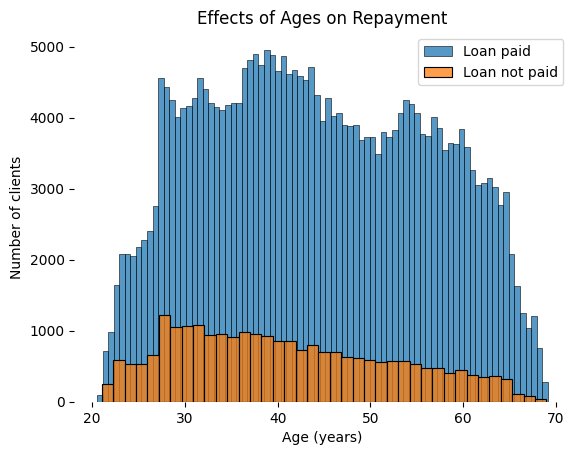

In [ ]:
# KDE plot of loans that were repaid on time
sns.histplot(train_df.loc[train_df['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Loan paid')#

# KDE plot of loans which were not repaid on time
sns.histplot(train_df.loc[train_df['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'Loan not paid')#

sns.despine(bottom = True, left = True)
# Labeling of plot
plt.xlabel('Age (years)');
plt.ylabel('Number of clients');
plt.title('Effects of Ages on Repayment');
plt.legend()

# Data preprocessing

In [ ]:
train_df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,LIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,provided_flag_documents,AMT_REQ_CREDIT_BUREAU_SUM
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Laborers,1.0,Business Entity Type 3,0.0190,2.0,2.0,2.0,2.0,1,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Core staff,2.0,School,0.0549,1.0,0.0,1.0,0.0,1,0.0




---



## correlation

In [ ]:
#encodage temporaire des variable categorielles pour etudier la correlation avec la target

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

temp_df=train_df.copy()
columns=temp_df.select_dtypes('object').columns
for col in columns:
    temp_df[col]=label.fit_transform(temp_df[col])

In [ ]:
temp_df.corr()['TARGET'].sort_values()

DAYS_BIRTH                  -0.078236
DAYS_EMPLOYED               -0.070192
DAYS_ID_PUBLISH             -0.051455
DAYS_REGISTRATION           -0.041950
AMT_GOODS_PRICE             -0.039654
NAME_CONTRACT_TYPE          -0.030868
ORGANIZATION_TYPE           -0.030787
AMT_CREDIT                  -0.030390
FLAG_OWN_CAR                -0.021862
LIVINGAREA_AVG              -0.021633
AMT_ANNUITY                 -0.012814
FLAG_OWN_REALTY             -0.006160
AMT_INCOME_TOTAL            -0.003970
AMT_REQ_CREDIT_BUREAU_SUM   -0.002969
SK_ID_CURR                  -0.002137
FLAG_EMAIL                  -0.001755
NAME_FAMILY_STATUS          -0.000484
FLAG_CONT_MOBILE             0.000370
FLAG_MOBIL                   0.000534
NAME_TYPE_SUITE              0.008316
OBS_60_CNT_SOCIAL_CIRCLE     0.008999
OBS_30_CNT_SOCIAL_CIRCLE     0.009108
CNT_FAM_MEMBERS              0.009269
provided_flag_documents      0.017240
OCCUPATION_TYPE              0.017367
CNT_CHILDREN                 0.019143
DEF_60_CNT_S

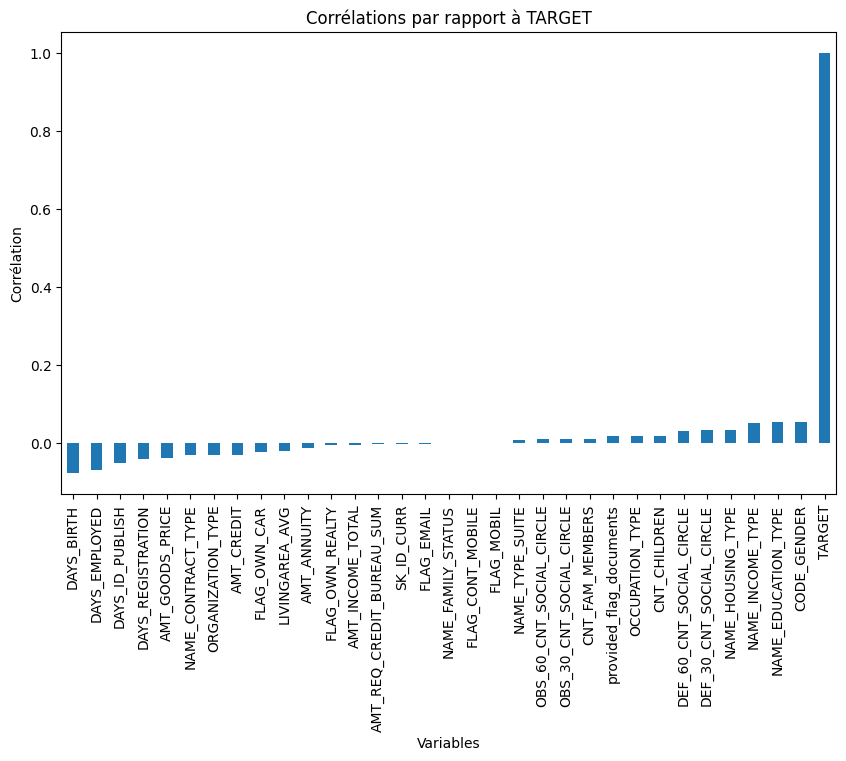

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des corrélations
correlations = temp_df.corr()['TARGET'].sort_values()

# Plot
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Corrélations par rapport à TARGET')
plt.xlabel('Variables')
plt.ylabel('Corrélation')
plt.show()


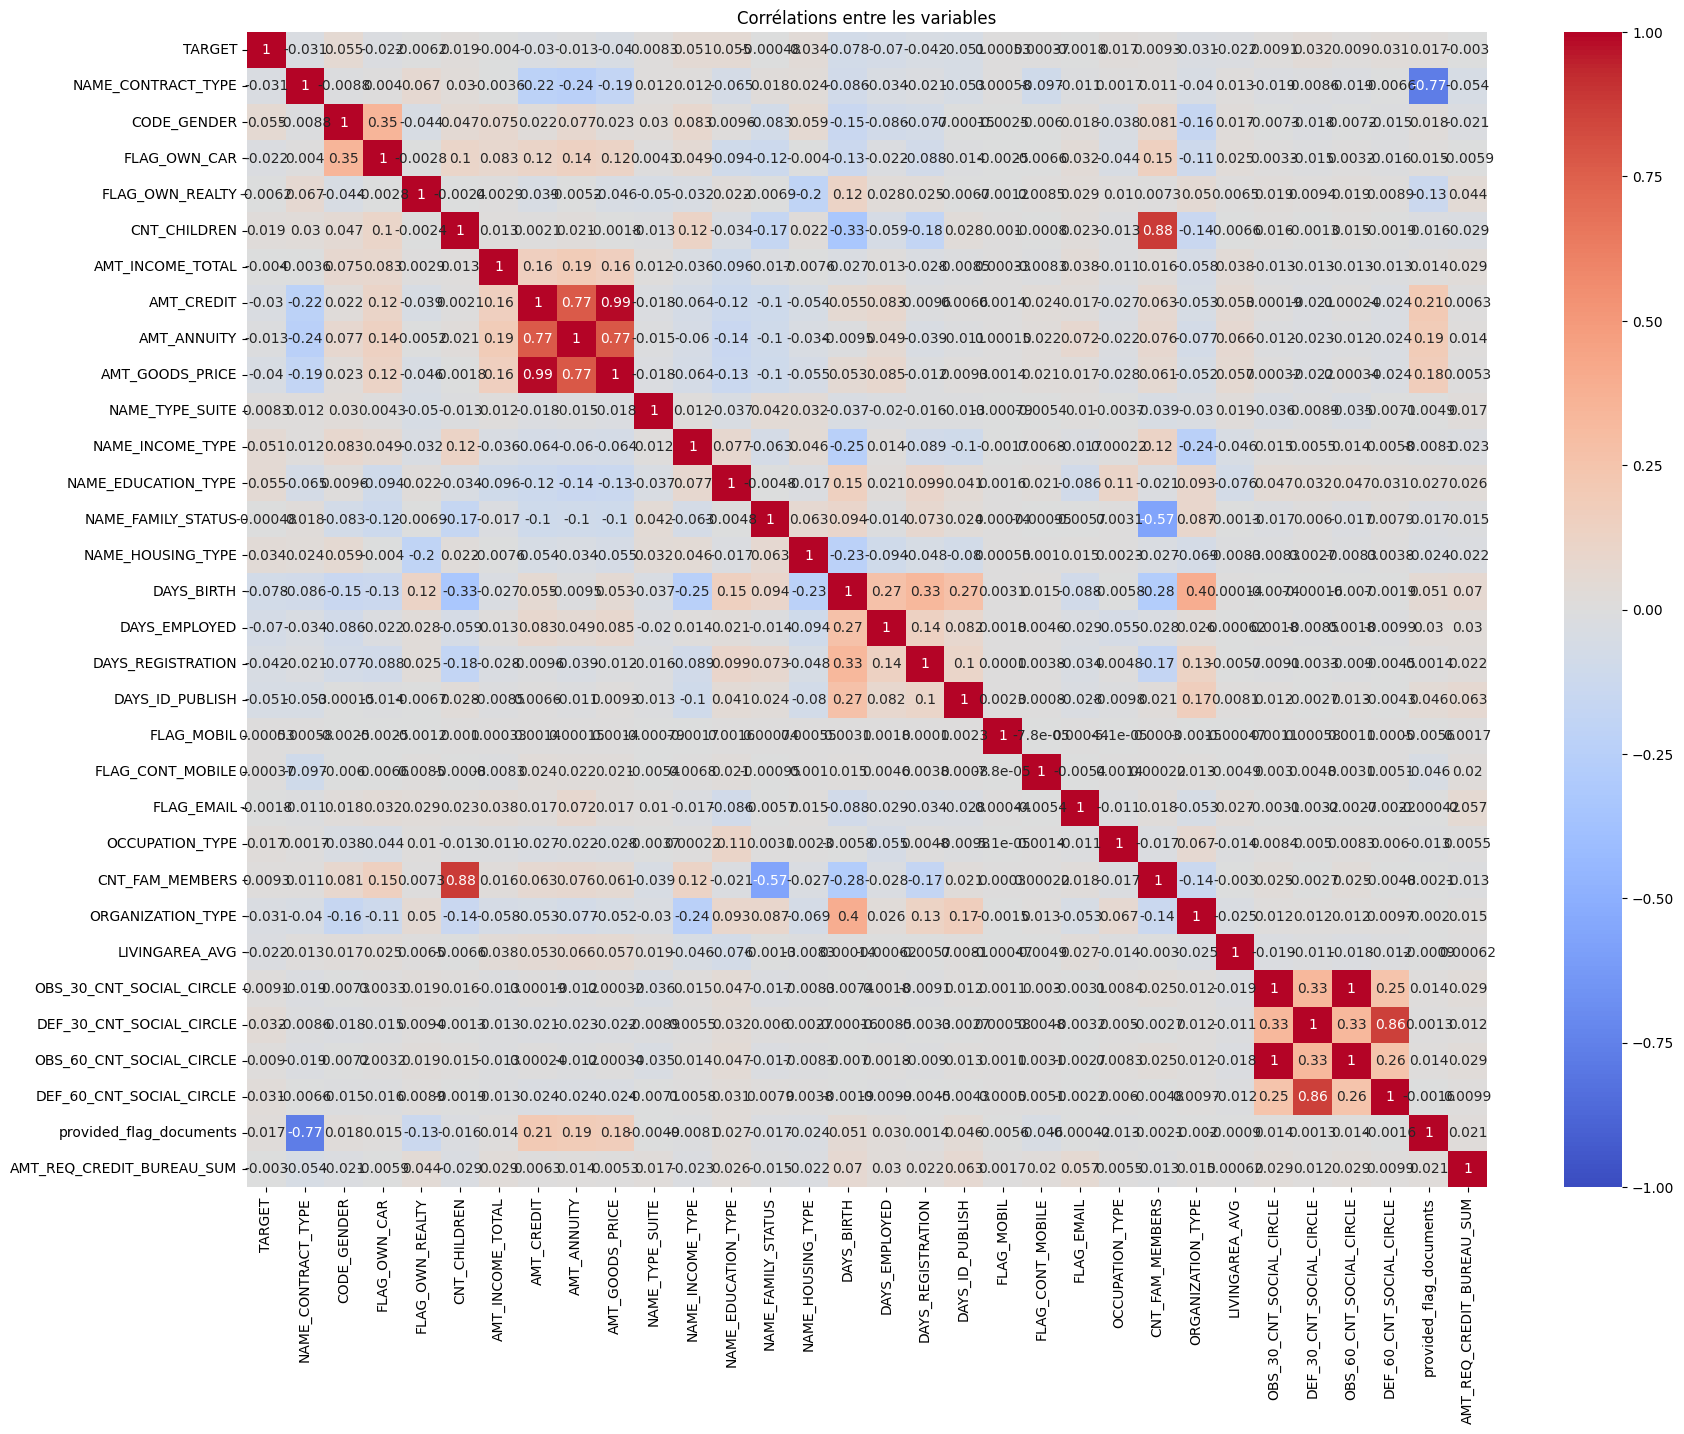

In [ ]:
correlations= temp_df.drop(columns='SK_ID_CURR').corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Corrélations entre les variables')
plt.show()

In [ ]:
upper_triangle=correlations.where(np.triu(np.ones_like(correlations, dtype=bool)))

high_correlation_pairs = np.where((upper_triangle > 0.75) & (upper_triangle < 1))

# Créer une liste pour stocker les paires de variables à éliminer
variables_to_drop = []

# Parcourir les indices des paires de variables
for i in range(len(high_correlation_pairs[0])):
    variable1 = upper_triangle.columns[high_correlation_pairs[0][i]]
    variable2 = upper_triangle.columns[high_correlation_pairs[1][i]]

    # Ajouter la paire à la liste des variables à éliminer
    variables_to_drop.append((variable1, variable2))

variables_to_drop

[('CNT_CHILDREN', 'CNT_FAM_MEMBERS'),
 ('AMT_CREDIT', 'AMT_ANNUITY'),
 ('AMT_CREDIT', 'AMT_GOODS_PRICE'),
 ('AMT_ANNUITY', 'AMT_GOODS_PRICE'),
 ('OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'),
 ('DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE')]

In [ ]:
for variable_pair in variables_to_drop:
  if variable_pair[1] in train_df.columns:
    train_df = train_df.drop(variable_pair[1], axis=1)
    test_df= test_df.drop(variable_pair[1], axis=1)
train_df.shape

(307500, 28)

In [ ]:
test_df=test_df.drop(columns='TARGET')

In [ ]:
cat2_col = train_df.select_dtypes('object').loc[:, list(train_df.select_dtypes('object').nunique() == 2)]
cat2_col

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,Cash loans,M,N,Y
1,Cash loans,F,N,N
2,Revolving loans,M,Y,Y
3,Cash loans,F,N,Y
4,Cash loans,M,N,Y
...,...,...,...,...
307506,Cash loans,M,N,N
307507,Cash loans,F,N,Y
307508,Cash loans,F,N,Y
307509,Cash loans,F,N,Y


In [ ]:
for col in cat2_col:
    display(test_df[col].loc[test_df[col].isnull()])

Series([], Name: NAME_CONTRACT_TYPE, dtype: object)

Series([], Name: CODE_GENDER, dtype: object)

Series([], Name: FLAG_OWN_CAR, dtype: object)

Series([], Name: FLAG_OWN_REALTY, dtype: object)

In [ ]:
train_df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,...,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,ORGANIZATION_TYPE,LIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,provided_flag_documents,AMT_REQ_CREDIT_BUREAU_SUM
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,Unaccompanied,...,True,True,False,Laborers,Business Entity Type 3,0.0190,2.0,2.0,1,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,Family,...,True,True,False,Core staff,School,0.0549,1.0,0.0,1,0.0


In [ ]:
test_df.head(2)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,ORGANIZATION_TYPE,LIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,provided_flag_documents,AMT_REQ_CREDIT_BUREAU_SUM
307511,100001,Cash loans,F,N,Y,0,135000.0,568800.0,Unaccompanied,Working,...,True,True,True,Laborers,Kindergarten,0.050500,0.0,0.0,1,0.0
307512,100005,Cash loans,M,N,Y,0,99000.0,222768.0,Unaccompanied,Working,...,True,True,False,Low-skill Laborers,Self-employed,0.108091,0.0,0.0,1,3.0


In [ ]:
train_df.to_csv('training_data.csv', index=False)
test_df.to_csv('testing_data.csv', index=False)

## Data Scaling and encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler


def data_processing(test_df, argument):

    """
    cette fonction va-etre sauvegarder comme un module python pour etre utiliser en traitement des donnée pour le dashboard
    """
    train_df = pd.read_csv('training_data.csv')
    target = train_df['TARGET']
    train_df = train_df.drop(columns='TARGET')

    # Sélection des colonnes de type 'object' et comptage du nombre de catégories uniques
    cat2_col = train_df.select_dtypes('object').loc[:, list(train_df.select_dtypes('object').nunique() == 2)]

    # Label encoding pour les variables avec 2 catégories différentes
    label = LabelEncoder()
    for col in cat2_col.columns:
        train_df[col] = label.fit_transform(train_df[col])
        test_df[col] = label.transform(test_df[col])

       # Sélection des colonnes catégorielles
    cat_col = train_df.select_dtypes('object').columns

    # Encodage one-hot pour les variables avec plus de 2 catégories
    encoder = OneHotEncoder(sparse=False)  # Ajout de sparse=False pour obtenir un tableau NumPy dense
    train_encoded = encoder.fit_transform(train_df[cat_col])
    columns = encoder.get_feature_names_out(cat_col)
    train_encoded_df = pd.DataFrame(train_encoded, columns=columns)
    train_df = pd.concat([train_df.drop(columns=cat_col), train_encoded_df], axis=1)

    test_encoded = encoder.transform(test_df[cat_col])
    test_encoded_df = pd.DataFrame(test_encoded, columns=columns)
    test_df = pd.concat([test_df.drop(columns=cat_col), test_encoded_df], axis=1)


    # Normalisation des données avec MinMaxScaler
    scaler = MinMaxScaler()
    cols_train = train_df.drop(columns='SK_ID_CURR').columns
    train_id = train_df['SK_ID_CURR']
    scaled_train_df = pd.DataFrame(scaler.fit_transform(train_df.drop(columns='SK_ID_CURR')), columns=cols_train)
    scaled_train_df['TARGET'] = target
    scaled_train_df['SK_ID_CURR'] = train_id

    if 'SK_ID_CURR' in test_df.columns:
        test_id = test_df['SK_ID_CURR']
        scaled_test_df = pd.DataFrame(scaler.transform(test_df.drop(columns='SK_ID_CURR')), columns=cols_train)
        scaled_test_df['SK_ID_CURR'] = test_id
    else:
        scaled_test_df = pd.DataFrame(scaler.transform(test_df), columns=cols_train)
        #scaled_testing_df = scaled_testing_df.set_index(test_id)  # Cette ligne semble inutile, car test_id n'est pas défini ici

    if argument == "train":
        return scaled_train_df
    elif argument == "test":
        return scaled_test_df
    elif argument == "both":
        return scaled_train_df, scaled_test_df




In [ ]:
#training_data=pd.read_csv('training_data.csv')
testing_data=pd.read_csv('testing_data.csv')


In [ ]:
training_data, testing_data =data_processing(testing_data, argument="both")
training_data.head(2)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,TARGET,SK_ID_CURR
0,0.0,1.0,0.0,1.0,0.0,0.001512,0.090287,0.111161,0.035563,0.147860,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100002
1,0.0,0.0,0.0,0.0,0.0,0.002089,0.311736,0.522886,0.066324,0.048071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100003


In [ ]:
sample_df=testing_data.sample(n=10, random_state=42)
sample_df.to_csv('sample_test.csv', index=False)

In [ ]:
sample_df.head(2)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,SK_ID_CURR
15071,0.0,1.0,1.0,1.0,0.105263,0.003628,0.202221,0.217531,0.064147,0.220614,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208550
10157,0.0,0.0,0.0,1.0,0.000000,0.000358,0.062742,0.696900,0.133803,0.007782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,173779


## data sampling

In [ ]:
#splitting train_df en train et test data
grouped_df = training_data.groupby('TARGET')

# Échantillonner 1500 observations de chaque groupe
sample_train = grouped_df.apply(lambda x: x.sample(n=1500, random_state=42))

# Réinitialiser l'index pour obtenir un DataFrame unique
sample_train = sample_train.set_index('SK_ID_CURR')

X=sample_train.drop(columns='TARGET')

y=sample_train['TARGET']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
135157,0.0,0.0,0.0,1.0,0.000000,0.000896,0.201520,0.762120,0.037182,0.053583,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
133055,1.0,0.0,0.0,1.0,0.000000,0.000935,0.022472,0.588275,0.003238,0.032223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210180,0.0,0.0,0.0,1.0,0.000000,0.001204,0.325843,0.780947,0.133803,0.429029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
252802,0.0,0.0,0.0,1.0,0.000000,0.000435,0.102247,0.144701,0.133803,0.042113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
109524,0.0,0.0,0.0,1.0,0.000000,0.000550,0.127409,0.861161,0.133803,0.432596,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390926,0.0,0.0,0.0,1.0,0.000000,0.000935,0.101124,0.055355,0.103059,0.131161,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
302327,0.0,0.0,0.0,1.0,0.000000,0.001012,0.369065,0.489008,0.195846,0.369407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252045,0.0,0.0,0.0,1.0,0.000000,0.003628,0.491596,0.276607,0.088042,0.077578,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modelisation

# Recherche des best params

# Testing des models

In [ ]:
best_params_df=pd.read_csv('./best_params.csv')
best_params_df

,Model,Scoring Method,Best Parameters,Best Estimator,Best Score
0,Logistic Regression,Accuracy,"{'C': 10, 'max_iter': 200, 'penalty': 'l2'}","LogisticRegression(C=10, max_iter=200)",0.589583
1,Logistic Regression,Precision,"{'C': 10, 'max_iter': 200, 'penalty': 'l2'}","LogisticRegression(C=10, max_iter=200)",0.592035
2,Logistic Regression,Recall,"{'C': 175, 'max_iter': 200, 'penalty': 'l2'}","LogisticRegression(C=175, max_iter=200)",0.613359
3,Logistic Regression,F1,"{'C': 175, 'max_iter': 200, 'penalty': 'l2'}","LogisticRegression(C=175, max_iter=200)",0.600706
4,Logistic Regression,ROC AUC,"{'C': 10, 'max_iter': 200, 'penalty': 'l2'}","LogisticRegression(C=10, max_iter=200)",0.589402
5,XGBoost,Accuracy,"{'eta': 0.2, 'learning_rate': 0.1, 'max_depth'...","XGBClassifier(base_score=None, booster=None, c...",0.613333
6,XGBoost,Precision,"{'eta': 0.2, 'learning_rate': 0.01, 'max_depth...","XGBClassifier(base_score=None, booster=None, c...",0.792308
7,XGBoost,Recall,"{'eta': 0.2, 'learning_rate': 0.2, 'max_depth'...","XGBClassifier(base_score=None, booster=None, c...",0.645529
8,XGBoost,F1,"{'eta': 0.2, 'learning_rate': 0.2, 'max_depth'...","XGBClassifier(base_score=None, booster=None, c...",0.627743
9,XGBoost,ROC AUC,"{'eta': 0.2, 'learning_rate': 0.1, 'max_depth'...","XGBClassifier(base_score=None, booster=None, c...",0.613075


## Score metier

Le déséquilibre entre le nombre de bons et de moins bons clients doit être pris en compte pour élaborer un modèle pertinent, à l’aide d’au moins une méthode au choix
Le déséquilibre du coût métier entre un faux négatif (FN - mauvais client prédit bon client : donc crédit accordé et perte en capital) et un faux positif (FP - bon client prédit mauvais : donc refus crédit et manque à gagner en marge)
Vous pourrez supposer, par exemple, que le coût d’un FN est dix fois supérieur au coût d’un FP
Vous créerez un score “métier” (minimisation du coût d’erreur de prédiction des FN et FP) pour comparer les modèles, afin de choisir le meilleur modèle et ses meilleurs hyperparamètres. Attention cette minimisation du coût métier doit passer par l’optimisation du seuil qui détermine, à partir d’une probabilité, la classe 0 ou 1 (un “predict” suppose un seuil à 0.5 qui n’est pas forcément l’optimum)
En parallèle, maintenez pour comparaison et contrôle des mesures plus techniques, telles que l’AUC et l’accuracy

In [ ]:
cost_fn=10
cost_fp= 1
def score_metier(y_test, y_pred, cost_fn, cost_fp):

  """
  l'objectif est de minimiser les coûts associés aux faux négatifs (FN) et faux positifs (FP),
  particulièrement en cas de déséquilibre entre les deux cibles.

  """

  cm = confusion_matrix(y_test, y_pred)
  fn = cm[1, 0]  # Faux Négatifs
  fp = cm[0, 1]  # Faux Positifs

  # Calculer le score métier
  score_metier = cost_fn * fn + cost_fp * fp  #plus le score metier est faible , plus le model est meilleur

  return score_metier

**Signification des methodes de scoring:**
1. ROC AUC Score : Cette métrique mesure la capacité du modèle à discriminer entre les classes. Un ROC AUC Score élevé indique une meilleure capacité de discrimination.

2. Accuracy : L'accuracy mesure la proportion d'échantillons correctement classés par le modèle. C'est une métrique globale qui peut être trompeuse en cas de classes déséquilibrées.

3. Precision : La précision mesure la proportion d'observations positives prédites correctement parmi toutes les observations prédites comme positives. Cela donne une indication de la qualité des prédictions positives.

4. Recall (Sensibilité) : Le recall mesure la proportion d'observations positives prédites correctement parmi toutes les observations réellement positives. Cela donne une indication de la capacité du modèle à capturer toutes les occurrences réelles de la classe positive.

5. F1 Score : Le F1 Score est la moyenne harmonique de la précision et du recall. Il offre un équilibre entre la précision et le recall.

6. Specificity : La spécificité mesure la proportion d'observations négatives prédites correctement parmi toutes les observations réellement négatives. Cela est particulièrement important lorsque le coût des faux positifs est élevé.

**Comment choisir automatiquement la meilleur methode de scroing correspondante au meilleur hyperparametre?**

1. un **score metier** faible: pénalise  10 fois plus les faux négatife que les faux positifs
2. **Recall (sensibilité)** (True Positive / (True Positive + False Negative)) proche de 1, indiquant la proportion des TP parmis toutes les observations qui sont rééllement positives
3. **Spécificité** (True Negative / (True Negative + False Positive)) indiquant la proportion des TN parmis toutes les observations qui sont rééllement négatives
3. **ROC AUC** Score élevé indiquant ainsi une meilleure capacité de discrimination.
4. L'**accuracy (exactitude)** ((True Positive + True Negative) / (Total samples)) indiquant la capacité de notre à predire correctement l'echantillon
6. Une score de **précision** élevé indiquant ainsi la proportion des TP parmis toutes les préditions positives


In [ ]:
import ast
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
green = '\033[92m'
yellow="\u001b[33m"


def model_testing(model, model_name, X_train, y_train, X_test, y_test ):

  """
  Cette fonction est pour comprarer la performances des hyperparametres pour chaque méthode de scoring
  """

  i=0
  scores=[]

  for param in best_params_df.loc[best_params_df['Model']==model_name, 'Best Parameters']:
    scoring_method=best_params_df.loc[best_params_df['Model']==model_name, 'Scoring Method'	].reset_index(drop=True)[i]
    estimator= model(**ast.literal_eval(param))
    estimator.fit(X_train, y_train)
    y_pred=estimator.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    score_metier_value= score_metier(y_test, y_pred, cost_fn, cost_fp)


    scores.append([scoring_method, param, recall_score(y_test, y_pred), specificity, precision_score(y_test, y_pred),
                          f1_score(y_test, y_pred), accuracy_score(y_test, y_pred), roc_auc_score(y_test, y_pred),
                          score_metier_value] + group_percentages)
    i+=1

  columns = ['Scoring Method', 'Best Parameters',  'Recall(Sensitivity)', 'Specificity',  'Precision',  'F1', 'Accuracy', 'ROC AUC Score',
              'Score Metier', "True Negative", "False Positive", "False Negative", "True Positive"]

  scores_df = pd.DataFrame([ score for score in scores], columns=columns).round(2)
  return scores_df


def best_param(model_name, scores_df):
  """
  boucle for pour choisir la meilleure methode de scoring (et aussi le meilleur hyperparametre)
  le meilleur hyperparametre va etre choisi selon:
    1. le score metier
    2. Recall (sensibilité) (True Positive / (True Positive + False Negative))
    3. Spécificité (True Negative / (True Negative + False Positive))
    4. ROC AUC Score
    5. L'accuracy (exactitude) ((True Positive + True Negative) / (Total samples))
    6.le score de précision
    """

    # Choix de la meilleure méthode de scoring ou bien je crée un score?????
  min_score_indices= scores_df.loc[scores_df['Score Metier'].eq(scores_df['Score Metier'].min())].index

  worst_score_metier_rows=scores_df.iloc[min_score_indices]
  sorting_order = ['Recall(Sensitivity)', 'Specificity', 'ROC AUC Score', 'Accuracy', 'Precision']

  sorted_scores=worst_score_metier_rows.sort_values(by=sorting_order, ascending=False)

  best_parameter=sorted_scores.reset_index(drop=True)['Best Parameters'][0]


  return best_parameter






In [ ]:
import ast
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay


def model_testing_thresholds(model, best_param, X_train, y_train, X_test, y_test ):

  """
  Cette fonction est pour tester differend threshold afin de définir le seuil optimal de prediction
  """

  i=0
  thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

  estimator= model(**ast.literal_eval(best_param))
  estimator.fit(X_train, y_train)
  proba=estimator.predict_proba(X_test)[:, 1]
  #pred=estimator.predict(X_test)

#    print(yellow+'\nles metrics de l\'estimator n:', i+1)

  scores=[]
  for threshold in thresholds:
    y_pred = (proba > threshold).astype(int)

    cm = confusion_matrix(y_test, y_pred)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    score_metier_value= score_metier(y_test, y_pred, cost_fn, cost_fp)


    scores.append([threshold, recall_score(y_test, y_pred), specificity, precision_score(y_test, y_pred),
                            f1_score(y_test, y_pred),
                          accuracy_score(y_test, y_pred), roc_auc_score(y_test, y_pred),
                          score_metier_value] + group_percentages)

  columns = ['Threshold', 'recall(Sensitivity)', 'Specificity',  'Precision', 'F1', 'Accuracy', 'ROC AUC Score',
            'Score Metier', "True Negative", "False Positive", "False Negative", "True Positive"]

  thresholds_scores_df = pd.DataFrame([score for score in scores], columns=columns).round(2)


  i+=1

  return (thresholds_scores_df)


def best_threshold(thresholds_scores_df):
  """
  le meilleur threshold sera celui ayant le meilleur ROC AUC Score
  """

  threshold= thresholds_scores_df.loc[thresholds_scores_df['ROC AUC Score'].idxmax(),'Threshold']

  return threshold



In [ ]:
#ajuster cette focntion pour qu'elle affiche les graph et score pour la meilleure methode de scoring et le seuil optimal de prediction

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

def Scoring(model, best_param, threshold, X_train, y_train, X_test, y_test):#, fold=0):

  """ cette foncyion va entrainer le model avec son meilleur hyperparametre et son threshold optimal,
  aprés elle va evaluer ses performance et tracer la courbe ROC AUC
  """

  #entrainement du model

  estimator= model(**ast.literal_eval(best_param))
  estimator.fit(X_train, y_train)
  proba=estimator.predict_proba(X_test)[:, 1]

  y_pred = (proba > threshold).astype(int)


  # Compute micro-average ROC curve and ROC area
  fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred.ravel())
  roc_auc = auc(fpr, tpr)
  f, axs = plt.subplots(1,3,figsize=(10,4),sharey=True)
  f.tight_layout()
  plt.subplot(1, 2, 1)
  lw = 2
  plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic curve')
  plt.legend(loc="lower right")
  plt.subplot(1, 2, 2)
  class_names = [0,1]

  # Confusion Matrix Display
  cf_matrix = confusion_matrix(y_test, y_pred)
  group_names = ["True Neg","False Pos","False Neg","True Pos"]
  group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  s = sns.heatmap(cf_matrix, annot=labels,fmt='')
  s.set_title("Confusion metric")
  plt.show()
  s.set(ylabel='True labels', xlabel='Predicted labels')

  scores = [precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred),
            accuracy_score(y_test, y_pred), roc_auc_score(y_test, y_pred) , score_metier(y_test, y_pred, cost_fn, cost_fp)]

  columns = ['Precision', 'Recall', 'F1', 'Accuracy', 'ROC AUC Score',  'Score Metier']

  final_model_scores_df=pd.DataFrame([scores], columns=columns).round(2)

  return final_model_scores_df

In [ ]:
final_models=pd.DataFrame(columns=['Model Name', 'Final Best Model', 'Threshold'])

## Regression logistic

In [ ]:
reg_scores= model_testing(LogisticRegression, 'Logistic Regression', X_train, y_train, X_test, y_test )
reg_scores

C:\Users\islem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\islem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

,Scoring Method,Best Parameters,Recall(Sensitivity),Specificity,Precision,F1,Accuracy,ROC AUC Score,Score Metier,True Negative,False Positive,False Negative,True Positive
0,Accuracy,"{'C': 10, 'max_iter': 200, 'penalty': 'l2'}",0.57,0.58,0.55,0.56,0.57,0.57,1362,30.17%,22.00%,20.50%,27.33%
1,Precision,"{'C': 10, 'max_iter': 200, 'penalty': 'l2'}",0.57,0.58,0.55,0.56,0.57,0.57,1362,30.17%,22.00%,20.50%,27.33%
2,Recall,"{'C': 175, 'max_iter': 200, 'penalty': 'l2'}",0.58,0.58,0.56,0.57,0.58,0.58,1330,30.50%,21.67%,20.00%,27.83%
3,F1,"{'C': 175, 'max_iter': 200, 'penalty': 'l2'}",0.58,0.58,0.56,0.57,0.58,0.58,1330,30.50%,21.67%,20.00%,27.83%
4,ROC AUC,"{'C': 10, 'max_iter': 200, 'penalty': 'l2'}",0.57,0.58,0.55,0.56,0.57,0.57,1362,30.17%,22.00%,20.50%,27.33%


In [ ]:
reg_best_param= best_param('Logistic Regression', reg_scores)
reg_best_param

"{'C': 175, 'max_iter': 200, 'penalty': 'l2'}"

In [ ]:
reg_thresholds_scores= model_testing_thresholds(LogisticRegression, reg_best_param, X_train, y_train, X_test, y_test )
reg_thresholds_scores

C:\Users\islem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Threshold,recall(Sensitivity),Specificity,Precision,F1,Accuracy,ROC AUC Score,Score Metier,True Negative,False Positive,False Negative,True Positive
0,0.1,0.99,0.02,0.48,0.65,0.48,0.50,337,1.00%,51.17%,0.50%,47.33%
1,0.2,0.97,0.07,0.49,0.65,0.50,0.52,380,3.83%,48.33%,1.50%,46.33%
2,0.3,0.93,0.14,0.50,0.65,0.52,0.54,469,7.33%,44.83%,3.33%,44.50%
3,0.4,0.79,0.34,0.52,0.63,0.55,0.56,817,17.67%,34.50%,10.17%,37.67%
4,0.5,0.58,0.58,0.56,0.57,0.58,0.58,1330,30.50%,21.67%,20.00%,27.83%
5,0.6,0.37,0.78,0.60,0.46,0.58,0.57,1880,40.50%,11.67%,30.17%,17.67%
6,0.7,0.15,0.93,0.68,0.25,0.56,0.54,2451,48.67%,3.50%,40.50%,7.33%
7,0.8,0.05,0.98,0.74,0.09,0.54,0.52,2735,51.33%,0.83%,45.50%,2.33%
8,0.9,0.01,0.99,0.50,0.01,0.52,0.50,2852,51.83%,0.33%,47.50%,0.33%


In [ ]:
reg_best_threshold=best_threshold(reg_thresholds_scores)
reg_best_threshold

0.5

C:\Users\islem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


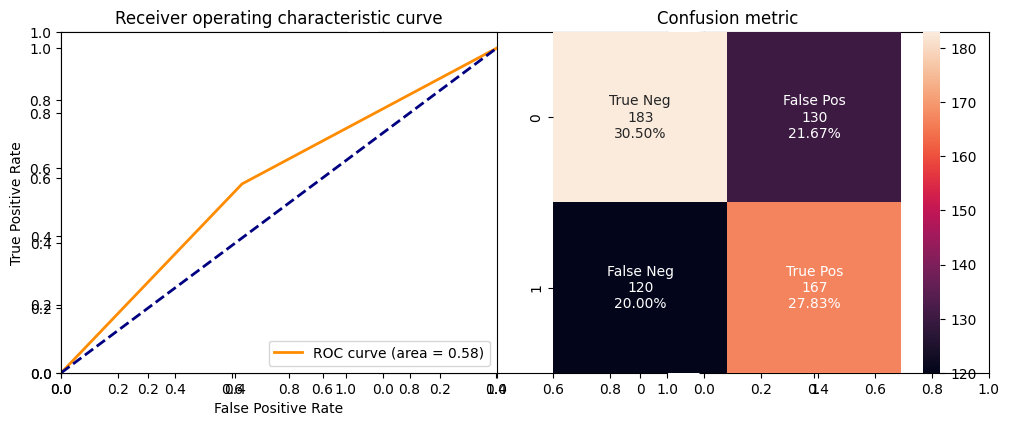

,Precision,Recall,F1,Accuracy,ROC AUC Score,Score Metier
0,0.56,0.58,0.57,0.58,0.58,1330


In [ ]:
reg_final_scores=Scoring(LogisticRegression, reg_best_param, reg_best_threshold, X_train, y_train, X_test, y_test)
reg_final_scores

In [ ]:
reg_final_model=LogisticRegression(**ast.literal_eval(reg_best_param))# sans threshold

final_models = pd.concat([final_models,
                          pd.DataFrame({'Model Name': ['Logistic Regression'], 'Final Best Model': [reg_final_model], 'Threshold':[reg_best_threshold]})],
                         ignore_index=True)

final_models

,Model Name,Final Best Model,Threshold
0,Logistic Regression,"LogisticRegression(C=175, max_iter=200)",0.5


## XGBoost

In [ ]:
xgb_scores= model_testing(XGBClassifier, 'XGBoost', X_train, y_train, X_test, y_test )
xgb_scores

,Scoring Method,Best Parameters,Recall(Sensitivity),Specificity,Precision,F1,Accuracy,ROC AUC Score,Score Metier,True Negative,False Positive,False Negative,True Positive
0,Accuracy,"{'eta': 0.2, 'learning_rate': 0.1, 'max_depth'...",0.65,0.60,0.60,0.62,0.62,0.63,1134,31.50%,20.67%,16.83%,31.00%
1,Precision,"{'eta': 0.2, 'learning_rate': 0.01, 'max_depth...",0.02,0.99,0.64,0.05,0.53,0.51,2804,51.50%,0.67%,46.67%,1.17%
2,Recall,"{'eta': 0.2, 'learning_rate': 0.2, 'max_depth'...",0.63,0.59,0.59,0.61,0.61,0.61,1187,31.00%,21.17%,17.67%,30.17%
3,F1,"{'eta': 0.2, 'learning_rate': 0.2, 'max_depth'...",0.63,0.59,0.59,0.61,0.61,0.61,1187,31.00%,21.17%,17.67%,30.17%
4,ROC AUC,"{'eta': 0.2, 'learning_rate': 0.1, 'max_depth'...",0.65,0.61,0.61,0.63,0.63,0.63,1122,31.83%,20.33%,16.67%,31.17%


In [ ]:
xgb_best_param= best_param('XGBoost', xgb_scores)
xgb_best_param

"{'eta': 0.2, 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 250, 'objective': 'binary:logistic'}"

In [ ]:
xgb_thresholds_scores=model_testing_thresholds(XGBClassifier, xgb_best_param, X_train, y_train, X_test, y_test )
xgb_thresholds_scores

C:\Users\islem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\islem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Threshold,recall(Sensitivity),Specificity,Precision,F1,Accuracy,ROC AUC Score,Score Metier,True Negative,False Positive,False Negative,True Positive
0,0.1,1.00,0.00,0.48,0.65,0.48,0.50,313,0.00%,52.17%,0.00%,47.83%
1,0.2,1.00,0.01,0.48,0.65,0.48,0.50,320,0.50%,51.67%,0.17%,47.67%
2,0.3,0.97,0.10,0.50,0.66,0.52,0.54,361,5.33%,46.83%,1.33%,46.50%
3,0.4,0.86,0.25,0.51,0.64,0.54,0.55,644,13.17%,39.00%,6.83%,41.00%
4,0.5,0.65,0.61,0.61,0.63,0.63,0.63,1122,31.83%,20.33%,16.67%,31.17%
5,0.6,0.31,0.84,0.64,0.42,0.58,0.57,2031,43.67%,8.50%,33.00%,14.83%
6,0.7,0.06,0.97,0.65,0.11,0.54,0.52,2709,50.67%,1.50%,45.00%,2.83%
7,0.8,0.00,1.00,0.00,0.00,0.52,0.50,2870,52.17%,0.00%,47.83%,0.00%
8,0.9,0.00,1.00,0.00,0.00,0.52,0.50,2870,52.17%,0.00%,47.83%,0.00%


In [ ]:
xgb_best_threshold=best_threshold(xgb_thresholds_scores)
xgb_best_threshold

0.5

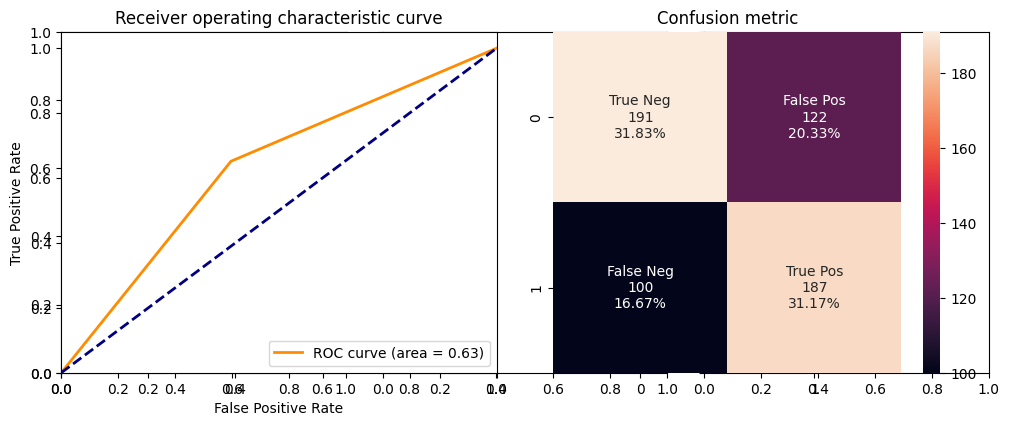

,Precision,Recall,F1,Accuracy,ROC AUC Score,Score Metier
0,0.61,0.65,0.63,0.63,0.63,1122


In [ ]:
xgb_final_scores=Scoring(XGBClassifier, xgb_best_param, xgb_best_threshold, X_train, y_train, X_test, y_test)
xgb_final_scores

In [ ]:
xgb_final_model=XGBClassifier(**ast.literal_eval(xgb_best_param))#, threshold=xgb_best_threshold)

final_models = pd.concat([final_models,
                          pd.DataFrame({'Model Name': ['XGBoost'], 'Final Best Model': [xgb_final_model], 'Threshold':[xgb_best_threshold]})],
                         ignore_index=True)
final_models

,Model Name,Final Best Model,Threshold
0,Logistic Regression,"LogisticRegression(C=175, max_iter=200)",0.5
1,XGBoost,"XGBClassifier(base_score=None, booster=None, c...",0.5


## K Neighbors Classifier

In [ ]:
KN_scores= model_testing(KNeighborsClassifier, 'K-Neighbors', X_train, y_train, X_test, y_test )
KN_scores

C:\Users\islem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\islem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

,Scoring Method,Best Parameters,Recall(Sensitivity),Specificity,Precision,F1,Accuracy,ROC AUC Score,Score Metier,True Negative,False Positive,False Negative,True Positive
0,Accuracy,"{'algorithm': 'auto', 'n_neighbors': 8, 'weigh...",0.55,0.50,0.50,0.52,0.52,0.52,1457,26.00%,26.17%,21.67%,26.17%
1,Precision,"{'algorithm': 'auto', 'n_neighbors': 2, 'weigh...",0.30,0.76,0.54,0.39,0.54,0.53,2074,39.83%,12.33%,33.33%,14.50%
2,Recall,"{'algorithm': 'auto', 'n_neighbors': 9, 'weigh...",0.57,0.48,0.50,0.53,0.52,0.52,1403,25.00%,27.17%,20.67%,27.17%
3,F1,"{'algorithm': 'auto', 'n_neighbors': 8, 'weigh...",0.55,0.50,0.50,0.52,0.52,0.52,1457,26.00%,26.17%,21.67%,26.17%
4,ROC AUC,"{'algorithm': 'auto', 'n_neighbors': 8, 'weigh...",0.55,0.50,0.50,0.52,0.52,0.52,1457,26.00%,26.17%,21.67%,26.17%


In [ ]:
KN_best_param= best_param('K-Neighbors', KN_scores)
KN_best_param

"{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}"

In [ ]:
KN_thresholds_scores= model_testing_thresholds(KNeighborsClassifier, KN_best_param, X_train, y_train, X_test, y_test )
KN_thresholds_scores

,Threshold,recall(Sensitivity),Specificity,Precision,F1,Accuracy,ROC AUC Score,Score Metier,True Negative,False Positive,False Negative,True Positive
0,0.1,1.00,0.00,0.48,0.65,0.48,0.50,323,0.00%,52.17%,0.17%,47.67%
1,0.2,0.96,0.03,0.47,0.63,0.47,0.49,425,1.33%,50.83%,2.00%,45.83%
2,0.3,0.90,0.09,0.48,0.62,0.48,0.49,584,4.83%,47.33%,5.00%,42.83%
3,0.4,0.77,0.25,0.48,0.60,0.50,0.51,886,12.83%,39.33%,10.83%,37.00%
4,0.5,0.57,0.48,0.50,0.53,0.52,0.52,1403,25.00%,27.17%,20.67%,27.17%
5,0.6,0.34,0.74,0.54,0.42,0.55,0.54,1981,38.67%,13.50%,31.67%,16.17%
6,0.7,0.16,0.90,0.59,0.25,0.55,0.53,2451,47.00%,5.17%,40.33%,7.50%
7,0.8,0.06,0.97,0.65,0.11,0.54,0.52,2709,50.67%,1.50%,45.00%,2.83%
8,0.9,0.00,0.99,0.20,0.01,0.52,0.50,2864,51.50%,0.67%,47.67%,0.17%


In [ ]:
KN_best_threshold=best_threshold(KN_thresholds_scores)
KN_best_threshold

0.6

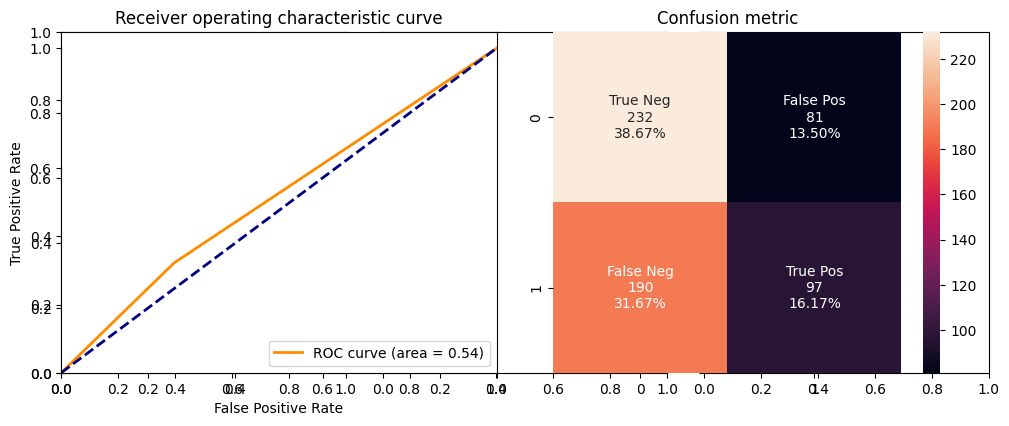

,Precision,Recall,F1,Accuracy,ROC AUC Score,Score Metier
0,0.54,0.34,0.42,0.55,0.54,1981


In [ ]:
KN_final_scores=Scoring(KNeighborsClassifier, KN_best_param, KN_best_threshold, X_train, y_train, X_test, y_test)
KN_final_scores

In [ ]:
KN_final_model=KNeighborsClassifier(**ast.literal_eval(KN_best_param))#, threshold=KN_best_threshold)

final_models = pd.concat([final_models,
                          pd.DataFrame({'Model Name': ['K-Neighbors'], 'Final Best Model': [KN_final_model], 'Threshold':[KN_best_threshold]})],
                         ignore_index=True)
final_models


,Model Name,Final Best Model,Threshold
0,Logistic Regression,"LogisticRegression(C=175, max_iter=200)",0.5
1,XGBoost,"XGBClassifier(base_score=None, booster=None, c...",0.5
2,K-Neighbors,KNeighborsClassifier(n_neighbors=9),0.6


## Decision Tree Classifier

In [ ]:
dtc_scores= model_testing(DecisionTreeClassifier, 'Decision Tree', X_train, y_train, X_test, y_test )
dtc_scores

,Scoring Method,Best Parameters,Recall(Sensitivity),Specificity,Precision,F1,Accuracy,ROC AUC Score,Score Metier,True Negative,False Positive,False Negative,True Positive
0,Accuracy,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.59,0.45,0.50,0.54,0.52,0.52,1361,23.67%,28.50%,19.83%,28.00%
1,Precision,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.71,0.40,0.52,0.60,0.55,0.56,1007,21.00%,31.17%,13.67%,34.17%
2,Recall,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.60,0.56,0.55,0.57,0.58,0.58,1298,29.17%,23.00%,19.33%,28.50%
3,F1,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.32,0.74,0.53,0.40,0.54,0.53,2040,38.83%,13.33%,32.67%,15.17%
4,ROC AUC,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.35,0.72,0.53,0.42,0.54,0.54,1957,37.67%,14.50%,31.17%,16.67%


In [ ]:
dtc_best_param= best_param('Decision Tree', dtc_scores)
dtc_best_param

"{'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 10, 'splitter': 'best'}"

In [ ]:
dtc_thresholds_scores= model_testing_thresholds(DecisionTreeClassifier, dtc_best_param, X_train, y_train, X_test, y_test )
dtc_thresholds_scores

C:\Users\islem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\islem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Threshold,recall(Sensitivity),Specificity,Precision,F1,Accuracy,ROC AUC Score,Score Metier,True Negative,False Positive,False Negative,True Positive
0,0.1,1.00,0.00,0.48,0.65,0.48,0.50,313,0.00%,52.17%,0.00%,47.83%
1,0.2,1.00,0.00,0.48,0.65,0.48,0.50,312,0.17%,52.00%,0.00%,47.83%
2,0.3,0.97,0.06,0.49,0.65,0.49,0.51,385,3.00%,49.17%,1.50%,46.33%
3,0.4,0.91,0.12,0.49,0.63,0.50,0.51,546,6.17%,46.00%,4.50%,43.33%
4,0.5,0.83,0.26,0.51,0.63,0.53,0.54,713,13.33%,38.83%,8.00%,39.83%
5,0.6,0.01,0.99,0.50,0.03,0.52,0.50,2834,51.50%,0.67%,47.17%,0.67%
6,0.7,0.01,0.99,0.60,0.02,0.52,0.50,2842,51.83%,0.33%,47.33%,0.50%
7,0.8,0.00,1.00,0.00,0.00,0.52,0.50,2870,52.17%,0.00%,47.83%,0.00%
8,0.9,0.00,1.00,0.00,0.00,0.52,0.50,2870,52.17%,0.00%,47.83%,0.00%


In [ ]:
dtc_best_threshold=best_threshold(dtc_thresholds_scores)
dtc_best_threshold

0.5

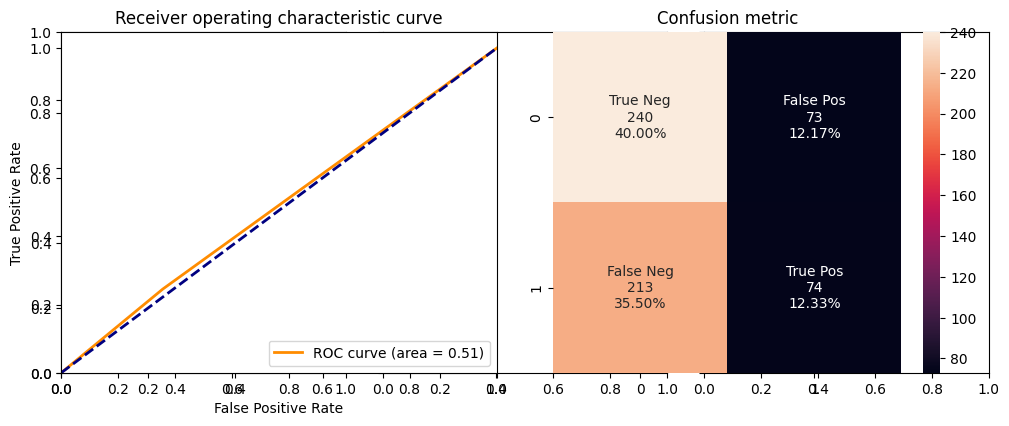

,Precision,Recall,F1,Accuracy,ROC AUC Score,Score Metier
0,0.5,0.26,0.34,0.52,0.51,2203


In [ ]:
dtc_final_scores=Scoring(DecisionTreeClassifier, dtc_best_param, dtc_best_threshold, X_train, y_train, X_test, y_test)
dtc_final_scores

In [ ]:
dtc_final_scores.loc[0, 'ROC AUC Score']

0.51

In [ ]:
dtc_final_model=DecisionTreeClassifier(**ast.literal_eval(dtc_best_param))#, threshold=dtc_best_threshold)

final_models = pd.concat([final_models,
                          pd.DataFrame({'Model Name': ['Decision Tree'], 'Final Best Model': [dtc_final_model], 'Threshold':[dtc_best_threshold]})],
                         ignore_index=True)
final_models


,Model Name,Final Best Model,Threshold
0,Logistic Regression,"LogisticRegression(C=175, max_iter=200)",0.5
1,XGBoost,"XGBClassifier(base_score=None, booster=None, c...",0.5
2,K-Neighbors,KNeighborsClassifier(n_neighbors=9),0.6
3,Decision Tree,"DecisionTreeClassifier(max_depth=3, max_featur...",0.5


## Models comparison

In [ ]:
model_names= best_params_df['Model'].unique()
dfs=[reg_final_scores, xgb_final_scores, KN_final_scores, dtc_final_scores]


comparison_df= pd.concat(dfs, ignore_index=True).set_index(model_names).reset_index().rename(columns={'index': 'Model'})

comparison_df

,Model,Precision,Recall,F1,Accuracy,ROC AUC Score,Score Metier
0,Logistic Regression,0.56,0.58,0.57,0.58,0.58,1330
1,XGBoost,0.61,0.65,0.63,0.63,0.63,1122
2,K-Neighbors,0.54,0.34,0.42,0.55,0.54,1981
3,Decision Tree,0.50,0.26,0.34,0.52,0.51,2203


C:\Users\islem\AppData\Local\Temp\ipykernel_13860\1913739765.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Model', y=metric, data=comparison_df, ci=None, ax=ax)
C:\Users\islem\AppData\Local\Temp\ipykernel_13860\1913739765.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\islem\AppData\Local\Temp\ipykernel_13860\1913739765.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Model', y=metric, data=comparison_df, ci=None, ax=ax)
C:\Users\islem\AppData\Local\Temp\ipykernel_13860\1913739765.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, hor

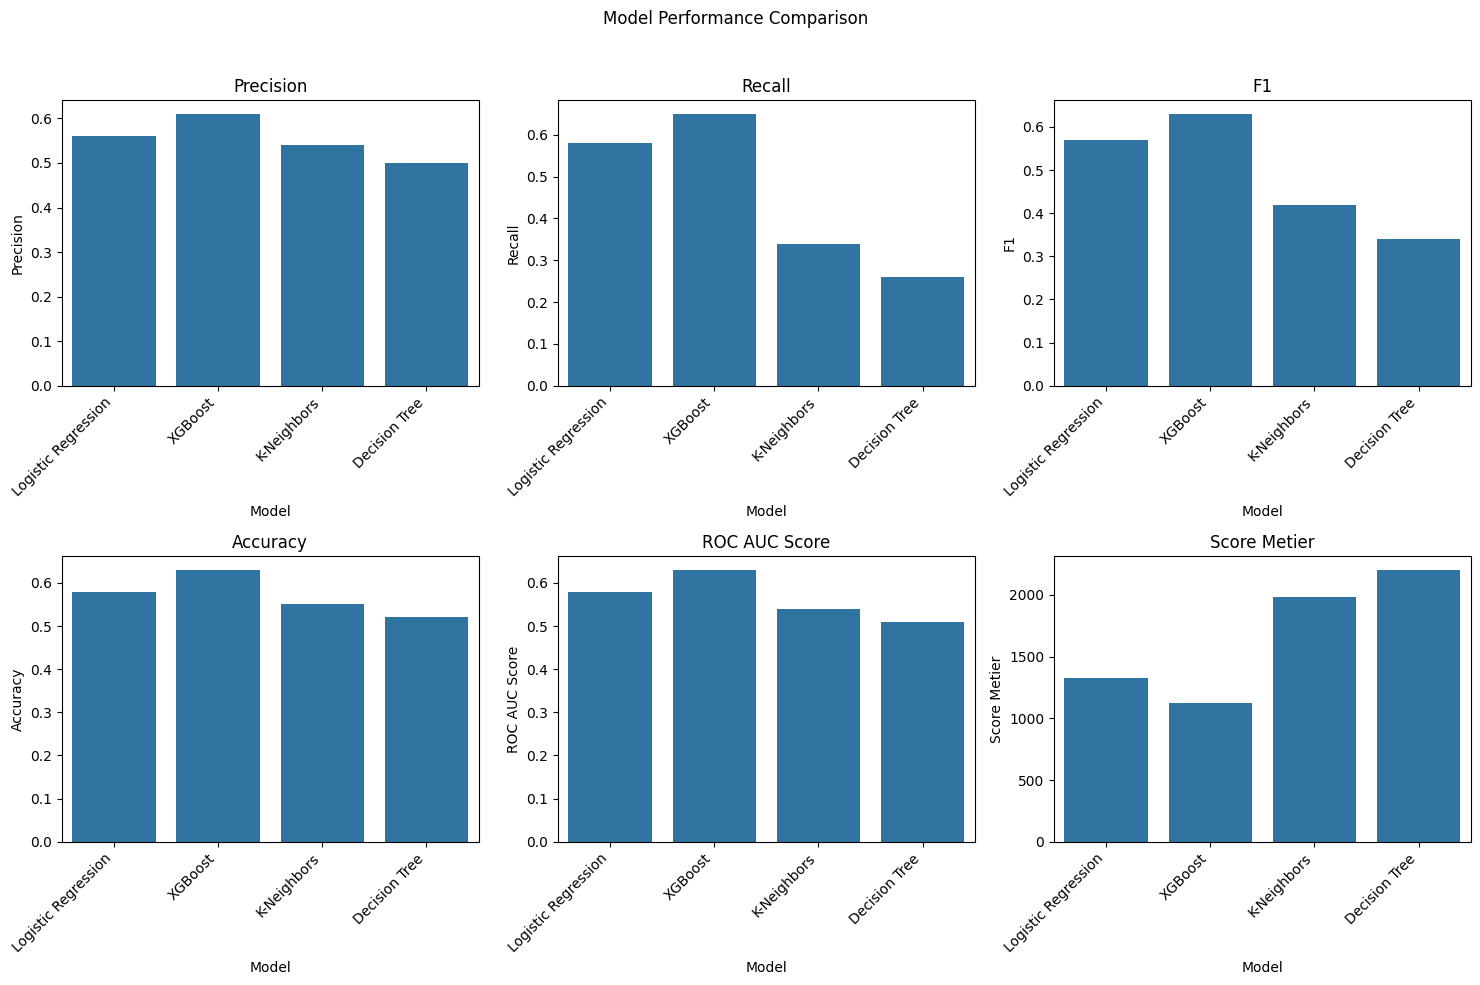

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
metrics = comparison_df.columns.drop('Model')

# Set up the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Model Performance Comparison')

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot each metric for each model
for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.barplot(x='Model', y=metric, data=comparison_df, ci=None, ax=ax)
    ax.set_title(metric)
    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


In [ ]:
#best model of all
best_model_name_of_all=comparison_df.loc[comparison_df['Accuracy'].idxmax(),'Model']
best_model_name_of_all

'XGBoost'

In [ ]:
final_model=final_models.loc[final_models['Model Name']==best_model_name_of_all, :]
#voir comment eregister le meilleur model ainsi que ses best parametre dans un fichier pour etre importer apres et utiliser pour une autre prediiction

In [ ]:
final_model.to_csv('./final_model.csv', index=False)

In [ ]:
final_model['Final Best Model'].values[0]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, ...)

# Déploiement du modèle séléctionner avec MLflow

In [ ]:
#deploiement
import mlflow
import mlflow.sklearn
import pickle
mlflow.end_run()

#mlflow.sklearn.autolog()#log_input_examples=True, silent=True)
mlflow.set_experiment('projet7_oc_1')


with mlflow.start_run():
    classifier=final_model['Final Best Model'].values[0]

    classifier.fit(X_train, y_train)


    probabilities=classifier.predict_proba(X_test)[:,1]

    mlflow.sklearn.log_model(classifier, "model")


In [ ]:
import mlflow
logged_model = 'runs:/7faa0e8554a24261a5cce0b499c4026c/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)


predictions=loaded_model.predict(sample_df.drop(columns=['SK_ID_CURR']))
predictions

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [ ]:
model = mlflow.sklearn.load_model('runs:/7faa0e8554a24261a5cce0b499c4026c/model')
model.predict_proba(sample_df.drop(columns=['SK_ID_CURR']))[:,1]

array([0.4292815 , 0.4092357 , 0.37814063, 0.5339827 , 0.4095969 ,
       0.5342773 , 0.63343626, 0.2015415 , 0.6355433 , 0.46327066],
      dtype=float32)

In [ ]:
sample_df['SK_ID_CURR'].to_list()

[208550,
 173779,
 365820,
 144092,
 291599,
 418609,
 398791,
 202661,
 185171,
 111761]